In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("dataset/newTrainingDataset.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id                           11055 non-null  int64
 1   having_IP_Address            11055 non-null  int64
 2   URL_Length                   11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [3]:
print(df.iloc[:,3].describe())

count    11055.000000
mean         0.738761
std          0.673998
min         -1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Shortining_Service, dtype: float64


In [4]:
df.shape

(11055, 32)

In [5]:
X=df.iloc[:,1:31]
y=df.iloc[:,31]
y

0       -1
1       -1
2       -1
3       -1
4        1
        ..
11050    1
11051   -1
11052   -1
11053   -1
11054   -1
Name: Result, Length: 11055, dtype: int64

In [6]:
X

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,-1,1,1,-1,-1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,1,-1,1,1,1,1,1,1,-1,1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,1,-1,1,0,1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,1,-1,1,1,1,1,-1,1,1,1


In [7]:
y

0       -1
1       -1
2       -1
3       -1
4        1
        ..
11050    1
11051   -1
11052   -1
11053   -1
11054   -1
Name: Result, Length: 11055, dtype: int64

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

<AxesSubplot:>

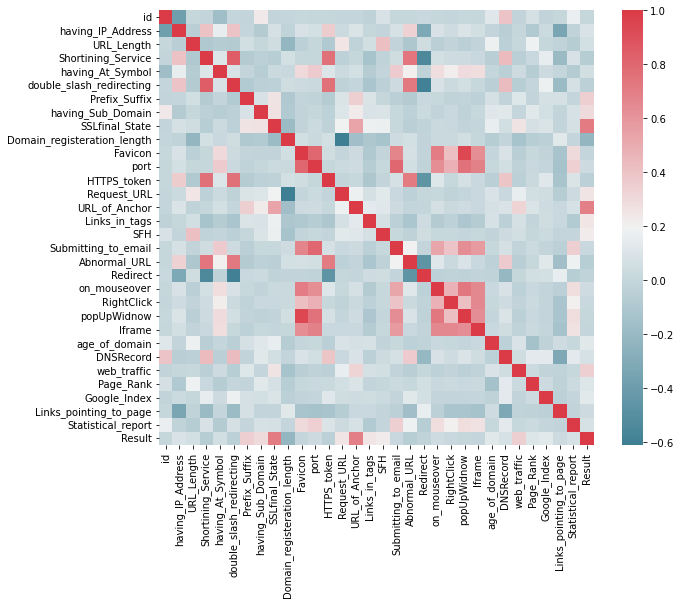

In [7]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


Minimum error: 0.046585255540479424 at K = 0


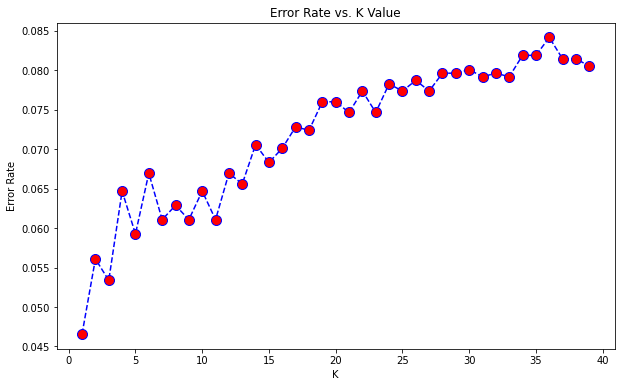

In [10]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [13]:
from sklearn.model_selection import GridSearchCV
grid_params_knn = { 'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs_knn = GridSearchCV(KNeighborsClassifier(), grid_params_knn, verbose = 1, cv=3, n_jobs = -1)
g_res_knn = gs_knn.fit(X_train, y_train)
g_res_knn.best_params_

Fitting 3 folds for each of 120 candidates, totalling 360 fits


{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

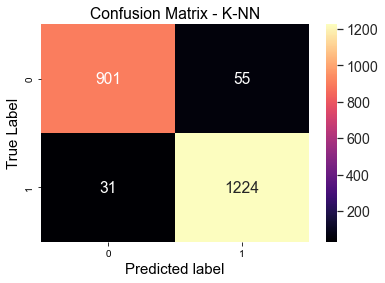

<Figure size 720x504 with 0 Axes>

0.9611035730438715


In [11]:
knn = KNeighborsClassifier(n_neighbors=7,weights='distance',metric='manhattan')
knn.fit(X_train,y_train)
pred_i = knn.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test,pred_i)
matrix_df = pd.DataFrame(confusion_matrix)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - K-NN')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)
plt.show()
print(accuracy_score(y_test,pred_i))

Fitting 3 folds for each of 380 candidates, totalling 1140 fits


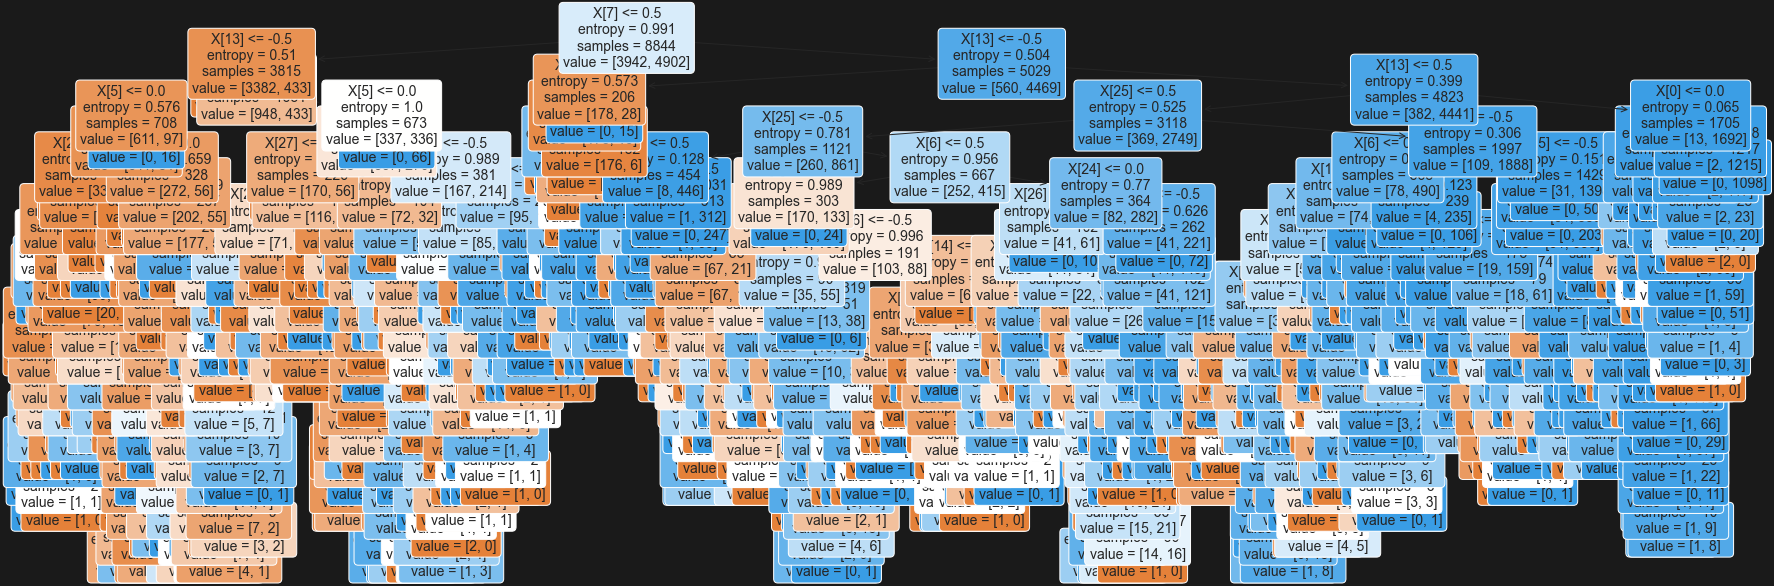

In [14]:
grid_params_dt = { 'max_depth' : [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,None],
               'max_leaf_nodes' : [3,5,7,9,11,13,15,17,19,None],
               'criterion' : ['gini','entropy']}
gs_dt = GridSearchCV(DecisionTreeClassifier(), grid_params_dt, verbose = 1, cv=3, n_jobs = -1)
g_res_dt = gs_dt.fit(X_train, y_train)
g_res_dt.best_params_
clf = DecisionTreeClassifier(max_depth =20,criterion='entropy',max_leaf_nodes=None ,random_state = 42)
clf.fit(X_train, y_train)
plt.figure(figsize=(30,10), facecolor ='k')

a = tree.plot_tree(clf,
    rounded = True,
    filled = True,
    fontsize=14)
plt.show()

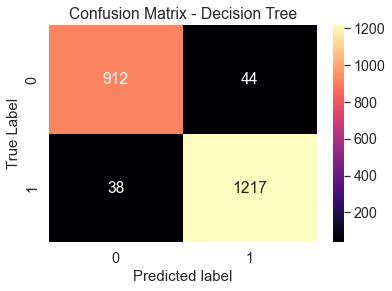

<Figure size 720x504 with 0 Axes>

0.9629127091813658


In [15]:
test_pred_decision_tree = clf.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test,test_pred_decision_tree)
matrix_df = pd.DataFrame(confusion_matrix)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)
plt.show()
print(accuracy_score(y_test,test_pred_decision_tree))

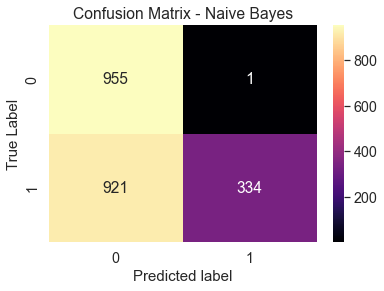

<Figure size 720x504 with 0 Axes>

0.5829941203075532


In [16]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
matrix_df = pd.DataFrame(confusion_matrix)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Naive Bayes')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)
plt.show()
print(accuracy_score(y_test, y_pred))

In [20]:
from sklearn.svm import SVC
grid_params_svm = { 'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['rbf', 'poly', 'sigmoid']}
gs_svm= GridSearchCV(SVC(), grid_params_svm, verbose = 1, cv=3, n_jobs = -1)
g_res_svm = gs_svm.fit(X_train, y_train)
g_res_svm.best_params_

Fitting 3 folds for each of 75 candidates, totalling 225 fits


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

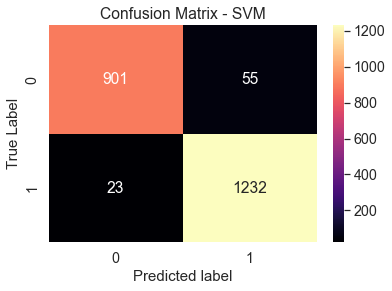

<Figure size 720x504 with 0 Axes>

0.9647218453188603


In [21]:
classifier_svm = SVC(C= 10, gamma= 0.1, kernel='rbf', random_state = 1)
classifier_svm.fit(X_train,y_train)
test_pred_svm= classifier_svm.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test,test_pred_svm)
matrix_df = pd.DataFrame(confusion_matrix)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - SVM')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)
plt.show()
print(accuracy_score(y_test,test_pred_svm))

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
grid_params_rf= {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]

                  }
gs_rf= GridSearchCV(RandomForestClassifier(), grid_params_rf, verbose = 1, cv=3, n_jobs = -1)
g_res_rf = gs_rf.fit(X_train, y_train)
g_res_rf.best_params_

Fitting 3 folds for each of 396 candidates, totalling 1188 fits


C:\Users\abhim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

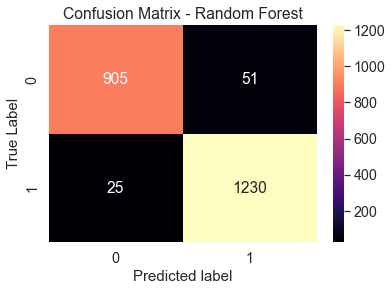

<Figure size 720x504 with 0 Axes>

0.9656264133876075


In [22]:
rf = RandomForestClassifier(bootstrap= True,
 max_depth= 80,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 2,random_state = 1)
rf.fit(X_train, y_train);
predictions = rf.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test,predictions)
matrix_df = pd.DataFrame(confusion_matrix)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Random Forest')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)
plt.show()
print(accuracy_score(y_test,predictions))

In [23]:
decisionTree = './web/model/decisionTree.sav'
knn = './web/model/knn.sav'
naiveBayes = './web/model/naiveBayes.sav'
svm = './web/model/svm.sav'

pickle.dump(decisionTree, open(decisionTree, 'wb'))
pickle.dump(knn, open(decisionTree, 'wb'))
pickle.dump(naiveBayes, open(decisionTree, 'wb'))
pickle.dump(classifier_svm, open(decisionTree, 'wb'))